In [8]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [9]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [10]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [11]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [12]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.27733445970769366, 0.647508073177189],
 'diameter': 76.2861601865842,
 'confidence': 0.8159075975418091,
 'timestamp': -274570.55845,
 'sphere': {'center': [3.5209992700667936,
   1.403044109091458,
   26.373822358747027],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [133.71418422401274, 110.93906023227609],
  'axes': [270.2596079839362, 270.2596079839362],
  'angle': 0.0},
 'circle_3d': {'center': [-2.301949518759229,
   -1.5658000167864303,
   18.29426593781958],
  'normal': [-0.5603135084510182, -0.28567715920960635, -0.7774556790925383],
  'radius': 2.0997313976791956},
 'diameter_3d': 4.199462795358391,
 'ellipse': {'center': [53.24821626387718, 67.67844994997972],
  'axes': [57.09212732174616, 76.2861601865842],
  'angle': 27.824208662892282},
 'location': [53.24821626387718, 67.67844994997972],
 'model_confidence': 1.0,
 'theta': 1.860509287006832,
 'phi': -2.195281254658678

Text(0.5, 0, 'Pupil timestamp (s)')

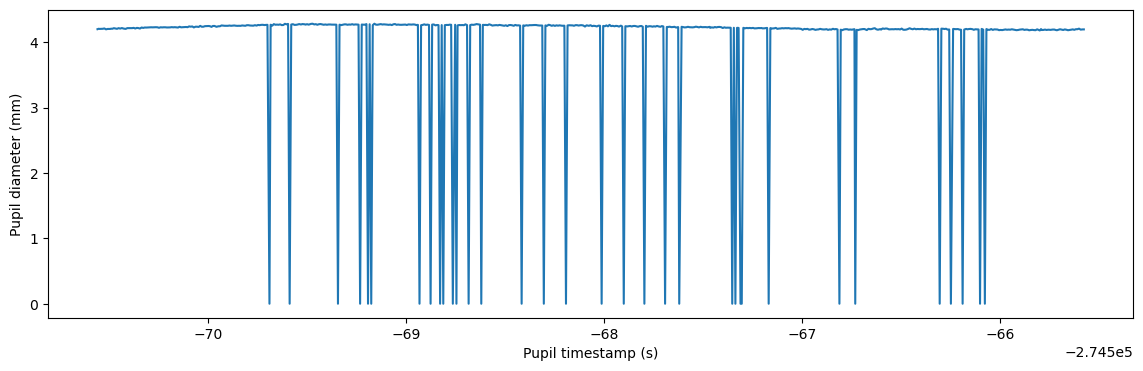

In [13]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')